## **Disease Progression Prediction**

Reg.No : 42111156

Name: A.M. Santina Appalo

Class: CSE - D5 - III yr

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           2579         35  1.0              
haseebindata/student-performance-predictions                     Student Performance Predictions                       9KB  2024-08-17 06:57:57          10645        231  0.9411765        
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           3692         85  1.0              
abdullah0a/retail-sales-data-with-seasonal-trends-and-m

In [ ]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

In [ ]:
!unzip alzheimers-dataset-4-class-of-images.zip -d ./data/

Streaming output truncated to the last 5000 lines.
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: ./data/Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: ./data/Alzheimer_s Datase

In [ ]:
!ls ./data/

'Alzheimer_s Dataset'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the dataset
train_dir = '/content/data/Alzheimer_s Dataset/test'
test_dir = '/content/data/Alzheimer_s Dataset/test'

# Create data generators for training and testing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training')

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

# Test data (used after training)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 1025 images belonging to 4 classes.
Found 254 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Load ResNet50 with ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 74,968,961 (285.98 MB)

 Trainable params: 51,381,249 (196.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the model using the train and validation data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 293s 9s/step - accuracy: 0.0223 - loss: -1072.0770 - val_accuracy: 0.0089 - val_loss: -5369.1089
Epoch 2/10
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3:49 7s/step - accuracy: 0.0000e+00 - loss: -3315.5063

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.0000e+00 - loss: -3315.5063 - val_accuracy: 0.0000e+00 - val_loss: -5630.9312
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 272s 9s/step - accuracy: 0.0104 - loss: -8115.4380 - val_accuracy: 0.0089 - val_loss: -17832.5430
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.0000e+00 - loss: -16001.3096 - val_accuracy: 0.0000e+00 - val_loss: -18357.3945
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 270s 8s/step - accuracy: 0.0095 - loss: -22714.6309 - val_accuracy: 0.0089 - val_loss: -39827.1602
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 989ms/step - accuracy: 0.0000e+00 - loss: -39173.7422 - val_accuracy: 0.0000e+00 - val_loss: -37692.5508
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 285s 9s/step - accuracy: 0.0171 - loss: -45563.5703 - val_accuracy: 0.0089 - val_loss: -70821.3203
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 979ms/step - accuracy: 0.0000e+00 - loss: -77075.4844 - val_accuracy: 0.0000e+00 - val_loss: -74392.9688
Epoch 9/10
32/32 ━

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 252s 6s/step - accuracy: 0.0141 - loss: -111182.3125
Test Accuracy: 0.009382329881191254


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale to [0, 1]
    return img_array

# Example image path (change this to your actual image path)
img_path = '/content/data/Alzheimer_s Dataset/test/ModerateDemented/27.jpg'
img_array = load_and_preprocess_image(img_path)

In [ ]:
# Make prediction
prediction = model.predict(img_array)
progression_score = prediction[0][0]

print(f"Predicted Disease Progression Score: {progression_score}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Predicted Disease Progression Score: 1.0


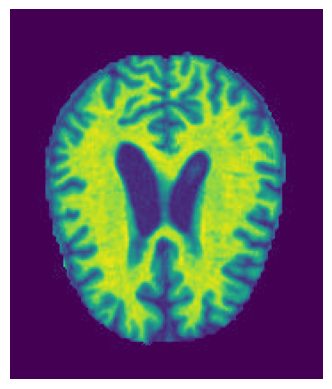

Predicted Disease Progression Score: 1.00


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
def display_image(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display the image and the prediction
display_image(img_path)
print(f"Predicted Disease Progression Score: {progression_score:.2f}")

In [ ]:
if progression_score == 1.00:
  print("The Disease is at a Severe stage")
else:
  print("The Disease is at the Early stage")

The Disease is at a Severe stage
